In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
import matplotlib

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
news = pd.read_csv("abc_news_clean.csv")



In [5]:
news['publish_date'] = pd.to_datetime(news['publish_date'])
news['financial_year'] = pd.to_datetime(news['financial_year'])

In [6]:
news.dtypes

publish_date      datetime64[ns]
headline_text             object
financial_year    datetime64[ns]
dtype: object

In [7]:
news

,publish_date,headline_text,financial_year
0,2003-02-19,aba decid against commun broadcast licence,2002-07-01
1,2003-02-19,act fire wit must be aware of defam,2002-07-01
2,2003-02-19,a g call for infrastructure protect summit,2002-07-01
3,2003-02-19,air nz staff in aust strike for pay rise,2002-07-01
4,2003-02-19,air nz strike to affect australian travel,2002-07-01
...,...,...,...
1186013,2019-12-31,vision of flame approach corryong in victoria,2019-07-01
1186014,2019-12-31,wa police and govern backflip on drug amnesti bin,2019-07-01
1186015,2019-12-31,we have fear for their safeti victorian premier,2019-07-01
1186016,2019-12-31,when do the start,2019-07-01


In [13]:
news.isna().sum()

publish_date       0
headline_text     12
financial_year     0
dtype: int64

In [15]:
news.loc[(news['headline_text'].isna())]

,publish_date,headline_text,financial_year
235989,2006-05-11,NaN,2005-07-01
236757,2006-05-15,NaN,2005-07-01
243358,2006-06-15,NaN,2005-07-01
254803,2006-08-10,NaN,2006-07-01
274837,2006-12-19,NaN,2006-07-01
603318,2011-03-25,NaN,2010-07-01
658067,2011-12-07,NaN,2011-07-01
771294,2013-03-18,NaN,2012-07-01
782023,2013-04-26,NaN,2012-07-01
784872,2013-05-08,NaN,2012-07-01


In [18]:
#news= 
news = news[~(news['headline_text'].isna())]

In [20]:
news.isna().sum()

publish_date      0
headline_text     0
financial_year    0
dtype: int64

In [23]:
news = news.reset_index(drop=True)

In [24]:
news

,publish_date,headline_text,financial_year
0,2003-02-19,aba decid against commun broadcast licence,2002-07-01
1,2003-02-19,act fire wit must be aware of defam,2002-07-01
2,2003-02-19,a g call for infrastructure protect summit,2002-07-01
3,2003-02-19,air nz staff in aust strike for pay rise,2002-07-01
4,2003-02-19,air nz strike to affect australian travel,2002-07-01
...,...,...,...
1186001,2019-12-31,vision of flame approach corryong in victoria,2019-07-01
1186002,2019-12-31,wa police and govern backflip on drug amnesti bin,2019-07-01
1186003,2019-12-31,we have fear for their safeti victorian premier,2019-07-01
1186004,2019-12-31,when do the start,2019-07-01


## Start looking at text content

In [25]:
#overall decrease in number of news headings
#may need rate of immigration articles as % of total for the year?
news['financial_year'].value_counts()

2012-07-01    93571
2013-07-01    86497
2011-07-01    81545
2007-07-01    79743
2008-07-01    78062
2010-07-01    76405
2014-07-01    76302
2009-07-01    75475
2005-07-01    73496
2015-07-01    73026
2004-07-01    72856
2003-07-01    72753
2006-07-01    67688
2016-07-01    53233
2017-07-01    44629
2018-07-01    36344
2002-07-01    27436
2019-07-01    16945
Name: financial_year, dtype: int64

In [26]:
news.iloc[:10]

,publish_date,headline_text,financial_year
0,2003-02-19,aba decid against commun broadcast licence,2002-07-01
1,2003-02-19,act fire wit must be aware of defam,2002-07-01
2,2003-02-19,a g call for infrastructure protect summit,2002-07-01
3,2003-02-19,air nz staff in aust strike for pay rise,2002-07-01
4,2003-02-19,air nz strike to affect australian travel,2002-07-01
5,2003-02-19,ambiti olsson win triple jump,2002-07-01
6,2003-02-19,antic delight with record break barca,2002-07-01
7,2003-02-19,aussie qualifi stosur waste four memphi match,2002-07-01
8,2003-02-19,aust address un secur council over iraq,2002-07-01
9,2003-02-19,australia is lock into war timetable opp,2002-07-01


In [27]:
subset2018_19 = news.loc[(news['financial_year'] == '2018-07-01')]

In [28]:
news[news["headline_text"].str.contains("migrant")].head(10)

,publish_date,headline_text,financial_year
10050,2003-04-08,council plan to attract more migrant,2002-07-01
14225,2003-04-28,suicide prevent help on the way for migrant,2002-07-01
19092,2003-05-22,mp back migrant boost scheme,2002-07-01
22390,2003-06-06,ruddock in spotlight over busi migrant,2002-07-01
25313,2003-06-20,new handbook to help migrant understand right,2002-07-01
25993,2003-06-24,alp look at increas migrant in region area,2002-07-01
26117,2003-06-24,migrant plan aim to boost region growth,2002-07-01
26361,2003-06-25,mayor offer migrant plan support,2002-07-01
26631,2003-06-26,push on to boost region migrant number,2002-07-01
28466,2003-07-06,crean say dont cut migrant but improve polici,2003-07-01


In [29]:
news['headline_text'].str.contains('boat').sum()

3899

In [32]:
# stops Oct 2017, one outlier June 2018 
# likely change in newspaper language policy
news[news["headline_text"].str.contains("illeg immigr")].tail()

,publish_date,headline_text,financial_year
1070640,2017-02-20,new guideline for detain and deport illeg immigr,2016-07-01
1070822,2017-02-21,us plan to crack down on illeg immigr,2016-07-01
1103952,2017-10-25,us appeal court rule illeg immigr teen can have abort,2017-07-01
1132002,2018-06-25,trump call for illeg immigr to be deport without trial,2017-07-01
1155008,2019-02-05,trump say wall need to curb illeg immigr,2018-07-01


In [34]:
news[news["headline_text"].str.contains("immigr")].tail(30)

,publish_date,headline_text,financial_year
1151643,2018-12-26,second guatemalan child die in us immigr custodi,2018-07-01
1152048,2019-01-02,maribyrnong immigr detent centre close,2018-07-01
1153019,2019-01-15,mexico migrant caravan immigr unit state donald trump,2018-07-01
1153502,2019-01-20,trump urge compromise over immigr deadlock,2018-07-01
1154412,2019-01-30,telstra boss call for end to unhealthi immigr deabte,2018-07-01
1154631,2019-02-01,paul burgess lose immigr challenge to stay in australia,2018-07-01
1155008,2019-02-05,trump say wall need to curb illeg immigr,2018-07-01
1155764,2019-02-13,labor immigr spokesman talk about the,2018-07-01
1155787,2019-02-13,pm announc immigr measure,2018-07-01
1159331,2019-03-21,australian immigr what do the number tell us,2018-07-01


In [35]:
news

,publish_date,headline_text,financial_year
0,2003-02-19,aba decid against commun broadcast licence,2002-07-01
1,2003-02-19,act fire wit must be aware of defam,2002-07-01
2,2003-02-19,a g call for infrastructure protect summit,2002-07-01
3,2003-02-19,air nz staff in aust strike for pay rise,2002-07-01
4,2003-02-19,air nz strike to affect australian travel,2002-07-01
...,...,...,...
1186001,2019-12-31,vision of flame approach corryong in victoria,2019-07-01
1186002,2019-12-31,wa police and govern backflip on drug amnesti bin,2019-07-01
1186003,2019-12-31,we have fear for their safeti victorian premier,2019-07-01
1186004,2019-12-31,when do the start,2019-07-01


In [36]:
#news[news["headline_text"].str.contains("refugee")].head()

In [37]:
news[news["headline_text"].str.contains("refugee")].head(10)

,publish_date,headline_text,financial_year
1788,2003-02-27,fund drought restrict iraqi refugee plan,2002-07-01
1860,2003-02-27,refugee support aim to raise appeal fund,2002-07-01
1928,2003-02-27,young push for refugee perman resid,2002-07-01
2142,2003-02-28,three children wound in gaza strip refugee camp,2002-07-01
2792,2003-03-04,call for refugee to be given visa certainti,2002-07-01
3067,2003-03-05,labor advocate special visa for e timor refugee,2002-07-01
3185,2003-03-05,un monitor indonesian refugee in png,2002-07-01
3307,2003-03-06,israel answer bu bomb die in refugee camp,2002-07-01
3383,2003-03-06,special visa wont help timor refugee clp,2002-07-01
3589,2003-03-07,refugee famili await lawyer return,2002-07-01


In [41]:
news[news["headline_text"].str.contains("iraqi")].head()

,publish_date,headline_text,financial_year
36,2003-02-19,dem hold plebiscite over iraqi conflict,2002-07-01
302,2003-02-20,iraqi use of human shield a war crime us,2002-07-01
706,2003-02-22,blix order destruct of iraqi missile,2002-07-01
761,2003-02-22,no confirm of iraqi wheat order awb,2002-07-01
817,2003-02-22,us stock rise follow positive iraqi comment,2002-07-01


- want to know if any words in migrant_words list are in news['headline_text'] 
- then make subset of df with these, use that for analyis
- come back later to improve list

In [42]:
migrant_news = news.copy()

In [43]:
migrant_words = ['refugee', 'refugees', 'migrant', 'migrants', 'asylum', 'immigr']

pattern = '|'.join(migrant_words)

In [44]:
#df['Match'] = df["Brand"].str.match(pattern, na=False)
migrant_news['migrant_news_col'] = migrant_news['headline_text'].str.contains(pattern)

In [45]:
#if migrant_news == True, keep
migrant_news = migrant_news[(migrant_news['migrant_news_col'] == True)]
migrant_news

,publish_date,headline_text,financial_year,migrant_news_col
114,2003-02-19,nth korean seek asylum at japanese embassi,2002-07-01,True
217,2003-02-20,british high court overturn new blair asylum,2002-07-01,True
293,2003-02-20,immigr raid in melbourne draw flak,2002-07-01,True
337,2003-02-20,more than detain after immigr raid,2002-07-01,True
379,2003-02-20,protocol were follow in immigr raid,2002-07-01,True
...,...,...,...,...
1185239,2019-12-19,medevac refugee lock in melbourne hotel,2019-07-01,True
1185617,2019-12-24,hobart church christma philippine and refugee famili,2019-07-01,True
1185626,2019-12-24,melbourne council offer asylum seeker in hotel free service,2019-07-01,True
1185673,2019-12-25,no retir yet for italian migrant turn supermarket mogul,2019-07-01,True


In [46]:

migrant_news

,publish_date,headline_text,financial_year,migrant_news_col
114,2003-02-19,nth korean seek asylum at japanese embassi,2002-07-01,True
217,2003-02-20,british high court overturn new blair asylum,2002-07-01,True
293,2003-02-20,immigr raid in melbourne draw flak,2002-07-01,True
337,2003-02-20,more than detain after immigr raid,2002-07-01,True
379,2003-02-20,protocol were follow in immigr raid,2002-07-01,True
...,...,...,...,...
1185239,2019-12-19,medevac refugee lock in melbourne hotel,2019-07-01,True
1185617,2019-12-24,hobart church christma philippine and refugee famili,2019-07-01,True
1185626,2019-12-24,melbourne council offer asylum seeker in hotel free service,2019-07-01,True
1185673,2019-12-25,no retir yet for italian migrant turn supermarket mogul,2019-07-01,True


In [47]:
migrant_news['financial_year'].value_counts()

2015-07-01    847
2013-07-01    710
2012-07-01    633
2014-07-01    575
2010-07-01    545
2016-07-01    535
2009-07-01    436
2011-07-01    430
2003-07-01    363
2005-07-01    346
2017-07-01    335
2018-07-01    304
2004-07-01    288
2006-07-01    244
2008-07-01    243
2007-07-01    192
2002-07-01    125
2019-07-01     81
Name: financial_year, dtype: int64

### check the migrant_news value counts as a percentage of the overall number of news articles per financial year

In [48]:
news_perc = migrant_news['financial_year'].value_counts() / news[
                        'financial_year'].value_counts() * 100

type(news_perc)

pandas.core.series.Series

### Any reason to have the news_perc column in the migrant news table? Don't think so...

In [49]:
migrant_news['news_perc_col'] = migrant_news['financial_year'].value_counts() / news[
                                             'financial_year'].value_counts() * 100

In [74]:
migrant_news.head()

,publish_date,headline_text,financial_year,migrant_news_col,news_perc_col
114,2003-02-19,nth korean seek asylum at japanese embassi,2002-07-01,True,NaN
217,2003-02-20,british high court overturn new blair asylum,2002-07-01,True,NaN
293,2003-02-20,immigr raid in melbourne draw flak,2002-07-01,True,NaN
337,2003-02-20,more than detain after immigr raid,2002-07-01,True,NaN
379,2003-02-20,protocol were follow in immigr raid,2002-07-01,True,NaN


In [65]:
migrant_news[migrant_news["headline_text"].str.contains("child")]

,publish_date,headline_text,financial_year,migrant_news_col,news_perc_col
2142,2003-02-28,three children wound in gaza strip refugee camp,2002-07-01,True,NaN
9833,2003-04-07,detain refugee children suffer social problem,2002-07-01,True,NaN
25467,2003-06-21,detain children a nation disgrace refugee,2002-07-01,True,NaN
25539,2003-06-21,refugee group want woomera children releas,2002-07-01,True,NaN
49576,2003-10-18,free children from immigr detent perth,2003-07-01,True,NaN
...,...,...,...,...,...
1149990,2018-12-07,trump govern separate migrant children from famili,2018-07-01,True,NaN
1151643,2018-12-26,second guatemalan child die in us immigr custodi,2018-07-01,True,NaN
1154788,2019-02-03,nauru last asylum seeker children to leave detent pm say,2018-07-01,True,NaN
1162387,2019-04-21,wa police offic teach migrant children to read,2018-07-01,True,NaN


In [73]:
migrant_news[migrant_news["headline_text"].str.contains("hanson")]

,publish_date,headline_text,financial_year,migrant_news_col,news_perc_col
335381,2007-10-05,hanson support african refugee reduct,2007-07-01,True,NaN
715483,2012-08-12,asylum seeker protect paramount hanson young,2012-07-01,True,NaN
811604,2013-08-16,sarah hanson young slam coalit asylum seeker,2013-07-01,True,NaN
1044426,2016-08-25,green hanson young disappoint to lose immigr portfolio,2016-07-01,True,NaN
1044811,2016-08-27,hanson young criticis di natale dump from immigr,2016-07-01,True,NaN
1047989,2016-09-14,pauline hanson maiden speech asian immigr,2016-07-01,True,NaN
1146061,2018-11-02,fact check pauline hanson refugee nauru,2018-07-01,True,NaN
1148817,2018-11-27,pauline hanson praise immigr polici of pre neolith tribe,2018-07-01,True,NaN
1180313,2019-10-27,the labor migrant vote for pauline hanson one nation,2019-07-01,True,NaN


In [63]:
migrant_news[migrant_news["headline_text"].str.contains("camp")]

,publish_date,headline_text,financial_year,migrant_news_col,news_perc_col
2142,2003-02-28,three children wound in gaza strip refugee camp,2002-07-01,True,NaN
3307,2003-03-06,israel answer bu bomb die in refugee camp,2002-07-01,True,NaN
5397,2003-03-17,isra troop enter refugee camp kill,2002-07-01,True,NaN
19660,2003-05-25,isra raid refugee camp as sharon back peace,2002-07-01,True,NaN
25355,2003-06-20,refugee group branch out with new campaign,2002-07-01,True,NaN
...,...,...,...,...,...
1165501,2019-05-23,orphan of kill australian is fighter in syrian refugee camp,2018-07-01,True,NaN
1166590,2019-06-04,islam state kid women releas from syrian refugee camp,2018-07-01,True,NaN
1168484,2019-06-24,kid of greta migrant camp lament lack of onsite monument,2018-07-01,True,NaN
1175590,2019-09-07,rohingya refugee famili torn apart love one stuck in camp,2019-07-01,True,NaN


In [51]:
migrant_news['news_perc_col'].value_counts()

Series([], Name: news_perc_col, dtype: int64)

In [52]:
news_perc_df = news_perc.to_frame()
type(news_perc_df)

pandas.core.frame.DataFrame

In [53]:
news_perc

2002-07-01    0.455606
2003-07-01    0.498948
2004-07-01    0.395300
2005-07-01    0.470774
2006-07-01    0.360477
2007-07-01    0.240773
2008-07-01    0.311291
2009-07-01    0.577675
2010-07-01    0.713304
2011-07-01    0.527316
2012-07-01    0.676492
2013-07-01    0.820838
2014-07-01    0.753584
2015-07-01    1.159861
2016-07-01    1.005016
2017-07-01    0.750633
2018-07-01    0.836452
2019-07-01    0.478017
Freq: AS-JUL, Name: financial_year, dtype: float64

In [54]:
news_perc1 = news_perc_df.reset_index()


In [55]:
news_perc1

,index,financial_year
0,2002-07-01,0.455606
1,2003-07-01,0.498948
2,2004-07-01,0.395300
3,2005-07-01,0.470774
4,2006-07-01,0.360477
5,2007-07-01,0.240773
6,2008-07-01,0.311291
7,2009-07-01,0.577675
8,2010-07-01,0.713304
9,2011-07-01,0.527316


In [263]:
news_perc1.dtypes

index             datetime64[ns]
financial_year           float64
dtype: object

In [264]:
news_perc1 = news_perc1.rename(
                    columns={'index': 'financial_year',
                            'financial_year': 'percentage'})

In [265]:
news_perc1

,financial_year,percentage
0,2002-07-01,0.455606
1,2003-07-01,0.498948
2,2004-07-01,0.395300
3,2005-07-01,0.470755
4,2006-07-01,0.360467
5,2007-07-01,0.240773
6,2008-07-01,0.311291
7,2009-07-01,0.577675
8,2010-07-01,0.713295
9,2011-07-01,0.527310


Need to convert financial_year into datetime.
Options: e.g. 2002-03: 
- just choose 2002, explain (but this is just getting half the year)
- considering we do have the date for this one, can put in exact dates by going back to the dates thing and maybe do a group by? 


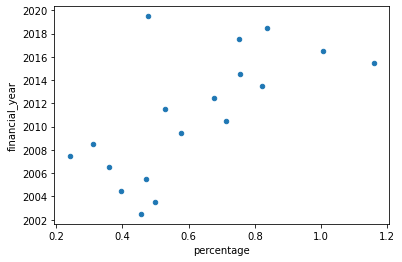

In [266]:
ax1 = news_perc1.plot.scatter(x='percentage', y='financial_year')

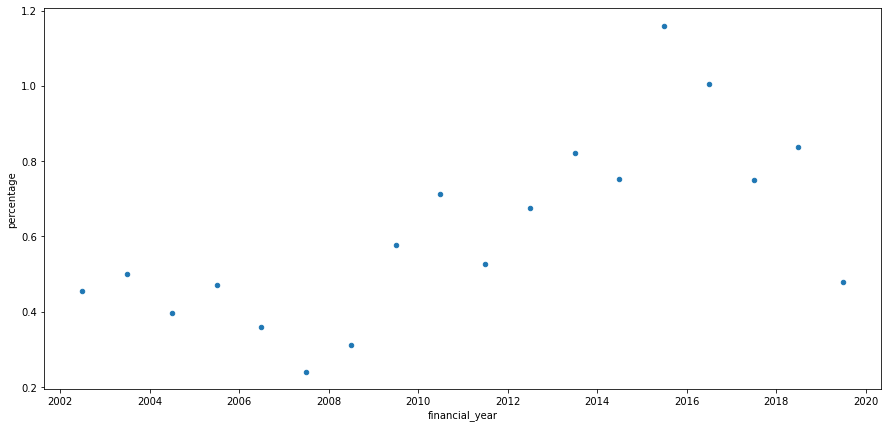

In [267]:
ax2 = news_perc1.plot.scatter(x='financial_year', y='percentage', figsize=(15,7))

- Looks like general positive trend- amount of news coverage on migration has increased over time
- coverage % has tripled from 2002-03 to 2015-16
- decrease in coverage 2006-09, possible slight dip from 2003 to 2008/9
- jump from 2008-09 to 2009-10
- jump from 2014-15 to peaking at 2015-16
- slow decrease after 2016, big drop from 2018-19 to 2019-20

In [276]:
news_perc1

,financial_year,percentage
0,2002-07-01,0.455606
1,2003-07-01,0.498948
2,2004-07-01,0.395300
3,2005-07-01,0.470755
4,2006-07-01,0.360467
5,2007-07-01,0.240773
6,2008-07-01,0.311291
7,2009-07-01,0.577675
8,2010-07-01,0.713295
9,2011-07-01,0.527310


In [278]:
#news_perc1['reg_year'] = news_perc1['financial_year']


In [286]:
#news_perc1 = news_perc1.drop(columns ='reg_year')

In [287]:
news_perc1['year_only'] = pd.DatetimeIndex(news_perc1['financial_year']).year

In [288]:
news_perc1

,financial_year,percentage,year_only
0,2002-07-01,0.455606,2002
1,2003-07-01,0.498948,2003
2,2004-07-01,0.395300,2004
3,2005-07-01,0.470755,2005
4,2006-07-01,0.360467,2006
5,2007-07-01,0.240773,2007
6,2008-07-01,0.311291,2008
7,2009-07-01,0.577675,2009
8,2010-07-01,0.713295,2010
9,2011-07-01,0.527310,2011


In [291]:
type(news_perc1)

pandas.core.frame.DataFrame

In [293]:
news_perc1.dtypes

financial_year    datetime64[ns]
percentage               float64
year_only                  int64
dtype: object

In [298]:
news_perc1['year_only'] = pd.to_numeric(news_perc1['year_only'], downcast='float')

In [299]:
news_perc1.dtypes

financial_year    datetime64[ns]
percentage               float64
year_only                float32
dtype: object

In [303]:
news_perc1 = (news_perc1
              .sort_values("financial_year")
              .assign(t=range(1, len(news_perc1)+1)))

In [320]:
news_perc1.sort_values('percentage')

,financial_year,percentage,year_only,t,const
5,2007-07-01,0.240773,2007.0,6,1
6,2008-07-01,0.311291,2008.0,7,1
4,2006-07-01,0.360467,2006.0,5,1
2,2004-07-01,0.395300,2004.0,3,1
0,2002-07-01,0.455606,2002.0,1,1
3,2005-07-01,0.470755,2005.0,4,1
17,2019-07-01,0.478017,2019.0,18,1
1,2003-07-01,0.498948,2003.0,2,1
9,2011-07-01,0.527310,2011.0,10,1
7,2009-07-01,0.577675,2009.0,8,1


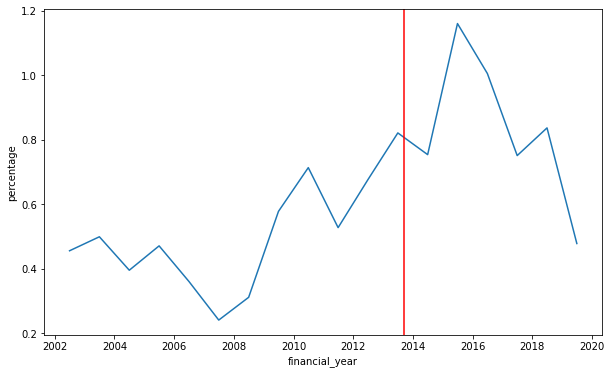

In [318]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=news_perc1, 
             x="financial_year", 
             y="percentage", 
             ax=ax);

#operation sovereign borders & election
ax.axvline(pd.to_datetime("2013-09-18"), color="red")
#September 18, 2013

- general upward trend
- dip around 2007-8
- peak 14-15 (2015-17)

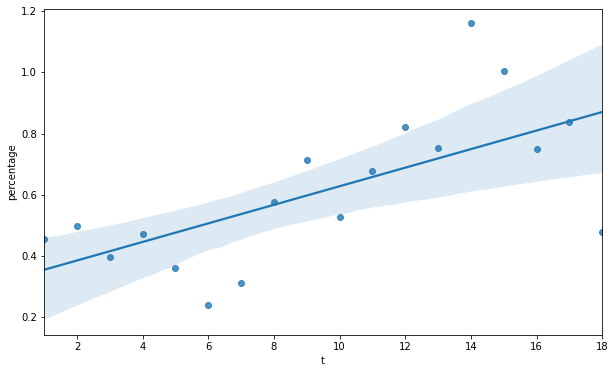

In [309]:
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(data=news_perc1, 
             x="t", 
             y="percentage", 
             ax=ax);

In [310]:
#add constant
news_perc1 = news_perc1.assign(const=1)
y = news_perc1["percentage"]
X = news_perc1[["const", "t"]]
lin_reg = sm.OLS(y, X)
results = lin_reg.fit()
results.summary()

/Users/imogen/opt/anaconda3/envs/matrix/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             percentage   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     12.32
Date:                Mon, 05 Oct 2020   Prob (F-statistic):            0.00291
Time:                        10:13:52   Log-Likelihood:                 5.3945
No. Observations:                  18   AIC:                            -6.789
Df Residuals:                      16   BIC:                            -5.008
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3248      0.094      3.473      0.003       0.127       0.523
t              0.0303      0.009      3.509      0.003       0.012       0.049
==============================================================================
Omnibus:                        1.150   Durbin-Watson:                   1.080
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                0.136
Skew:                          -0.064   Prob(JB):                        0.934
Kurtosis:                       3.407   Cond. No.                         22.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared of 0.435 indicates moderate positive correlation. 

- Given our data, assuming the null hypothesis (of 0), the likelihood of obtaining the regression coefficient that we observed or more extreme is 0.003. Since this is below the Alpha level of 5%, it is statistically significant and we can reject the null hypothesis.

- So we can say that there has been an increase in the percentage of news about migration over time (from 2002 to 2019/20).

- But there are some outliers.

In [321]:
news_perc1

,financial_year,percentage,year_only,t,const
0,2002-07-01,0.455606,2002.0,1,1
1,2003-07-01,0.498948,2003.0,2,1
2,2004-07-01,0.395300,2004.0,3,1
3,2005-07-01,0.470755,2005.0,4,1
4,2006-07-01,0.360467,2006.0,5,1
5,2007-07-01,0.240773,2007.0,6,1
6,2008-07-01,0.311291,2008.0,7,1
7,2009-07-01,0.577675,2009.0,8,1
8,2010-07-01,0.713295,2010.0,9,1
9,2011-07-01,0.527310,2011.0,10,1


## export news_perc1 to csv

In [322]:
news_perc1.to_csv('migr_news_year_percent.csv', sep=',', index=False, date_format='%Y-%m-%d')

In [306]:
import statsmodels.api as sm
X = sm.add_constant(news_perc1.t)
model = sm.OLS(news_perc1.percentage,x)
#est = sm.OLS(y, X.astype(float)).fit()
#TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

results = model.fit()
print(results.summary())

#ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(news_perc1.year_only)
model = sm.OLS(news_perc1.percentage,x.astype(float)).fit()
#est = sm.OLS(y, 
#TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

results = model.fit()
print(results.summary())

In [218]:
'''
import matplotlib.pyplot as plt
plt.plot(news_perc)

plt.ylabel('some numbers')
plt.show()
#(figsize=(6,3) '''

"\nimport matplotlib.pyplot as plt\nplt.plot(news_perc)\n\nplt.ylabel('some numbers')\nplt.show()\n#(figsize=(6,3) "

In [176]:
import seaborn as sns

plt.scatter(news_perc)
plt.show()


TypeError: scatter() missing 1 required positional argument: 'y'

In [134]:
news['financial_year'].value_counts()

2012-13    93571
2013-14    86497
2011-12    81545
2007-08    79743
2008-09    78062
2010-11    76405
2014-15    76302
2009-10    75475
2005-06    73496
2015-16    73026
2004-05    72856
2003-04    72753
2006-07    67688
2016-17    53233
2017-18    44629
2018-19    36344
2002-03    27436
2019-20    16945
Name: financial_year, dtype: int64

In [95]:
news['headline_text'].apply(lambda x: 1 if any(i in x for i in migrant_words) else 0)

0          1
1          0
2          0
3          0
4          0
          ..
1186001    0
1186002    0
1186003    0
1186004    0
1186005    0
Name: headline_text, Length: 1186006, dtype: int64

In [96]:
#this seems to work
#news_copy = news_copy[~(news_copy['headline_text'] == ' ')]

news['headline_text'].apply(lambda x: any([i in x for i in migrant_words])).sum()

10668

In [97]:
news['headline_text'].apply(lambda x: any([i in x for i in migrant_words]))


0           True
1          False
2          False
3          False
4          False
           ...  
1186001    False
1186002    False
1186003    False
1186004    False
1186005    False
Name: headline_text, Length: 1186006, dtype: bool

In [63]:
news['headline_text'].apply(lambda x: 1 if any(i in x for i in migrant_words) else 0).sum()

#didn't work: 
#df['col1'].apply(lambda x: 1 if any(i in x for i in searchfor) else 0)
#df[df['Behavior'].str.contains('nt|nv', na=False)]
#news[news.headline_text.apply(lambda x: migrant_words in x)]
#news['headline_text'].apply(lambda x: i for i in migrant_words).sum()
#news['headline_text'].isin(migrant_words).sum()
#doesn't work - searches for exact match: news.headline_text.isin(migrant_words)

7232

additional words
- detainee ( + detent centre, port hedland, woomera, christma is, easter island, 
- protest, hunger strike, png
- detent centre + protest

Exclude: 
- don dale detainee (youth or juvenile detent centre)
- refugee camp (e.g. gaza)
                

In [50]:
news['headline_text'].str.contains('detent centre').sum()

793

In [27]:
news['headline_text'].str.contains('refugee').sum()

2274

In [14]:
news['headline_text'].str.contains('refugees').sum()

2

In [41]:

news['headline_text'].str.contains('asylum').sum()


3104

In [48]:
news['headline_text'].str.contains('immigr').sum()

1145

In [28]:
news['headline_text'].str.contains('immigrant').sum()

0

In [29]:
news['headline_text'].str.contains('immigrants').sum()

0

In [15]:
news['headline_text'].str.contains('nauru').sum()

938

In [25]:
news['headline_text'].str.contains('migrant').sum()

850

In [26]:
news['headline_text'].str.contains('migrants').sum()

0

In [23]:
news['headline_text'].str.contains('asylum seeker').sum()

2247

In [24]:
news["headline_text"].str.contains("asylum seekers").sum()

1

In [18]:
news['headline_text'].str.contains('manus').sum()

25

In [30]:
news['headline_text'].str.contains('manu').sum()

1661

In [20]:
news[news["headline_text"].str.contains("migrant")]

,publish_date,headline_text,financial_year
10050,2003-04-08,council plan to attract more migrant,2002-03
14225,2003-04-28,suicide prevent help on the way for migrant,2002-03
19092,2003-05-22,mp back migrant boost scheme,2002-03
22390,2003-06-06,ruddock in spotlight over busi migrant,2002-03
25313,2003-06-20,new handbook to help migrant understand right,2002-03
...,...,...,...
1181637,2019-11-10,lebanese migrant famili histori in region aust...,2019-20
1184261,2019-12-08,migrant learn english to help them get job,2019-20
1184936,2019-12-16,climate migrant move south to tasmania,2019-20
1185673,2019-12-25,no retir yet for italian migrant turn supermar...,2019-20


In [ ]:
# set variables for the start and end date as datetimes
#year_before_2013_elect = pd.to_datetime("2012-09-18")
#election_2013 = pd.to_datetime("2013-09-18")

# NOT USING

In [ ]:
#DROP COLUMNS
migrant_news.drop(columns = 'migrant_news_col')